In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Imputation
from fancyimpute import IterativeImputer

# Visualize missing
import missingno as msno

%matplotlib inline

In [3]:
df_pdf = pd.read_csv('../Analysis/final.csv')

# Display first 5 Rows.
df_pdf.head()

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,AA_Obfuscated,OpenAction_Obfuscated,AcroForm_Obfuscated,JBIG2Decode_Obfuscated,RichMedia_Obfuscated,Launch_Obfuscated,EmbeddedFile_Obfuscated,XFA_Obfuscated,pageno_Obfuscated,Malicious
0,927eb9ebf03748be39637284224d811e,9,180,1,9,0,0,0,0,No,...,0,0,0,0,0,0,0,1,0,Yes
1,fa52d2f82686287d972dc353b0fdbd15,12,180,1,9,0,0,0,0,No,...,0,0,0,0,0,0,0,1,0,Yes
2,4eb5e4a52518f4c70d97f3a47526f558,15,180,1,10,0,0,0,0,No,...,0,0,0,0,0,0,0,1,0,Yes
3,96e6e2dda69b2814152c5d400c61cafb,16,180,1,10,0,0,0,0,No,...,0,0,0,0,0,0,0,1,0,Yes
4,294617661a240f71662ebe0e35aa7559,172,271,1,44,0,0,0,0,Yes,...,0,0,0,0,0,0,0,2,0,No


In [4]:
# Get a brief summary for our PDF dataset.
df_pdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   MD5                      30828 non-null  object
 1   pdfsize                  30828 non-null  int64 
 2   metadata size            30828 non-null  int64 
 3   pages                    30828 non-null  int64 
 4   xref length              30828 non-null  int64 
 5   title characters         30828 non-null  int64 
 6   isEncrypted              30828 non-null  int64 
 7   embedded files           30828 non-null  int64 
 8   images                   30828 non-null  int64 
 9   contains text            30828 non-null  object
 10  	header                  30828 non-null  object
 11  obj                      30828 non-null  int64 
 12  endobj                   30828 non-null  int64 
 13  stream                   30828 non-null  int64 
 14  endstream                30828 non-nul

In [5]:
# Check number of (Columns, Rows) in our dataset.
df_pdf.shape  #(31 features, 1 Fine Name, 1 Class -> 33)

(30828, 45)

In [6]:
# check data types for our dataset.
df_pdf.dtypes.value_counts()


int64     41
object     4
Name: count, dtype: int64

In [7]:

# Show Stats summary for our numeric/float64 columns.
df_pdf.describe()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,obj,endobj,...,JavaScript_Obfuscated,AA_Obfuscated,OpenAction_Obfuscated,AcroForm_Obfuscated,JBIG2Decode_Obfuscated,RichMedia_Obfuscated,Launch_Obfuscated,EmbeddedFile_Obfuscated,XFA_Obfuscated,pageno_Obfuscated
count,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,...,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000
mean,54.374497,285.149799,2.781562,3781.653432,33.695374,0.003406,0.016933,-0.025010,37.400804,37.988971,...,0.000551,0.005060,0.000616,0.000260,0.000260,0.000843,0.007623,0.000973,2.897982,0.007201
std,279.275407,1125.855897,9.994180,20478.925677,953.271290,0.059365,0.146892,0.156157,189.913299,220.279652,...,0.023477,0.071413,0.024819,0.016107,0.018009,0.029029,0.087350,0.031181,13.271667,0.087571
min,0.000000,4.000000,0.000000,3.000000,0.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,180.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,15.000000,201.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,50.000000,298.000000,1.000000,45.000000,7.000000,0.000000,0.000000,0.000000,26.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,23816.000000,77185.000000,983.000000,263987.000000,76993.000000,1.000000,8.000000,0.000000,22625.000000,22625.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1966.000000,2.000000


In [8]:
# Check total Missing values.
sum(df_pdf.isnull().sum())


0

In [9]:
# Check Missing values for each column
df_pdf.isnull().sum()

MD5                        0
pdfsize                    0
metadata size              0
pages                      0
xref length                0
title characters           0
isEncrypted                0
embedded files             0
images                     0
contains text              0
\theader                   0
obj                        0
endobj                     0
stream                     0
endstream                  0
xref                       0
trailer                    0
startxref                  0
pageno                     0
Encrypt                    0
ObjStm                     0
JS                         0
JavaScript                 0
AA                         0
OpenAction                 0
AcroForm                   0
JBIG2Decode                0
RichMedia                  0
Launch                     0
EmbeddedFile               0
XFA                        0
URI                        0
Colors                     0
JS_Obfuscated              0
JavaScript_Obf

In [30]:
# Display Missing values for specific column
df_pdf[df_pdf.MD5.isnull()]

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,AA_Obfuscated,OpenAction_Obfuscated,AcroForm_Obfuscated,JBIG2Decode_Obfuscated,RichMedia_Obfuscated,Launch_Obfuscated,EmbeddedFile_Obfuscated,XFA_Obfuscated,pageno_Obfuscated,Malicious


In [31]:
# Display 3 random Missing values
df_pdf[df_pdf.isnull().any(axis=1)].head(3)

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,AA_Obfuscated,OpenAction_Obfuscated,AcroForm_Obfuscated,JBIG2Decode_Obfuscated,RichMedia_Obfuscated,Launch_Obfuscated,EmbeddedFile_Obfuscated,XFA_Obfuscated,pageno_Obfuscated,Malicious
0,927eb9ebf03748be39637284224d811e,9.0,180.0,1.0,9.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes
1,fa52d2f82686287d972dc353b0fdbd15,12.0,180.0,1.0,9.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes
2,4eb5e4a52518f4c70d97f3a47526f558,15.0,180.0,1.0,10.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Model\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Model\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


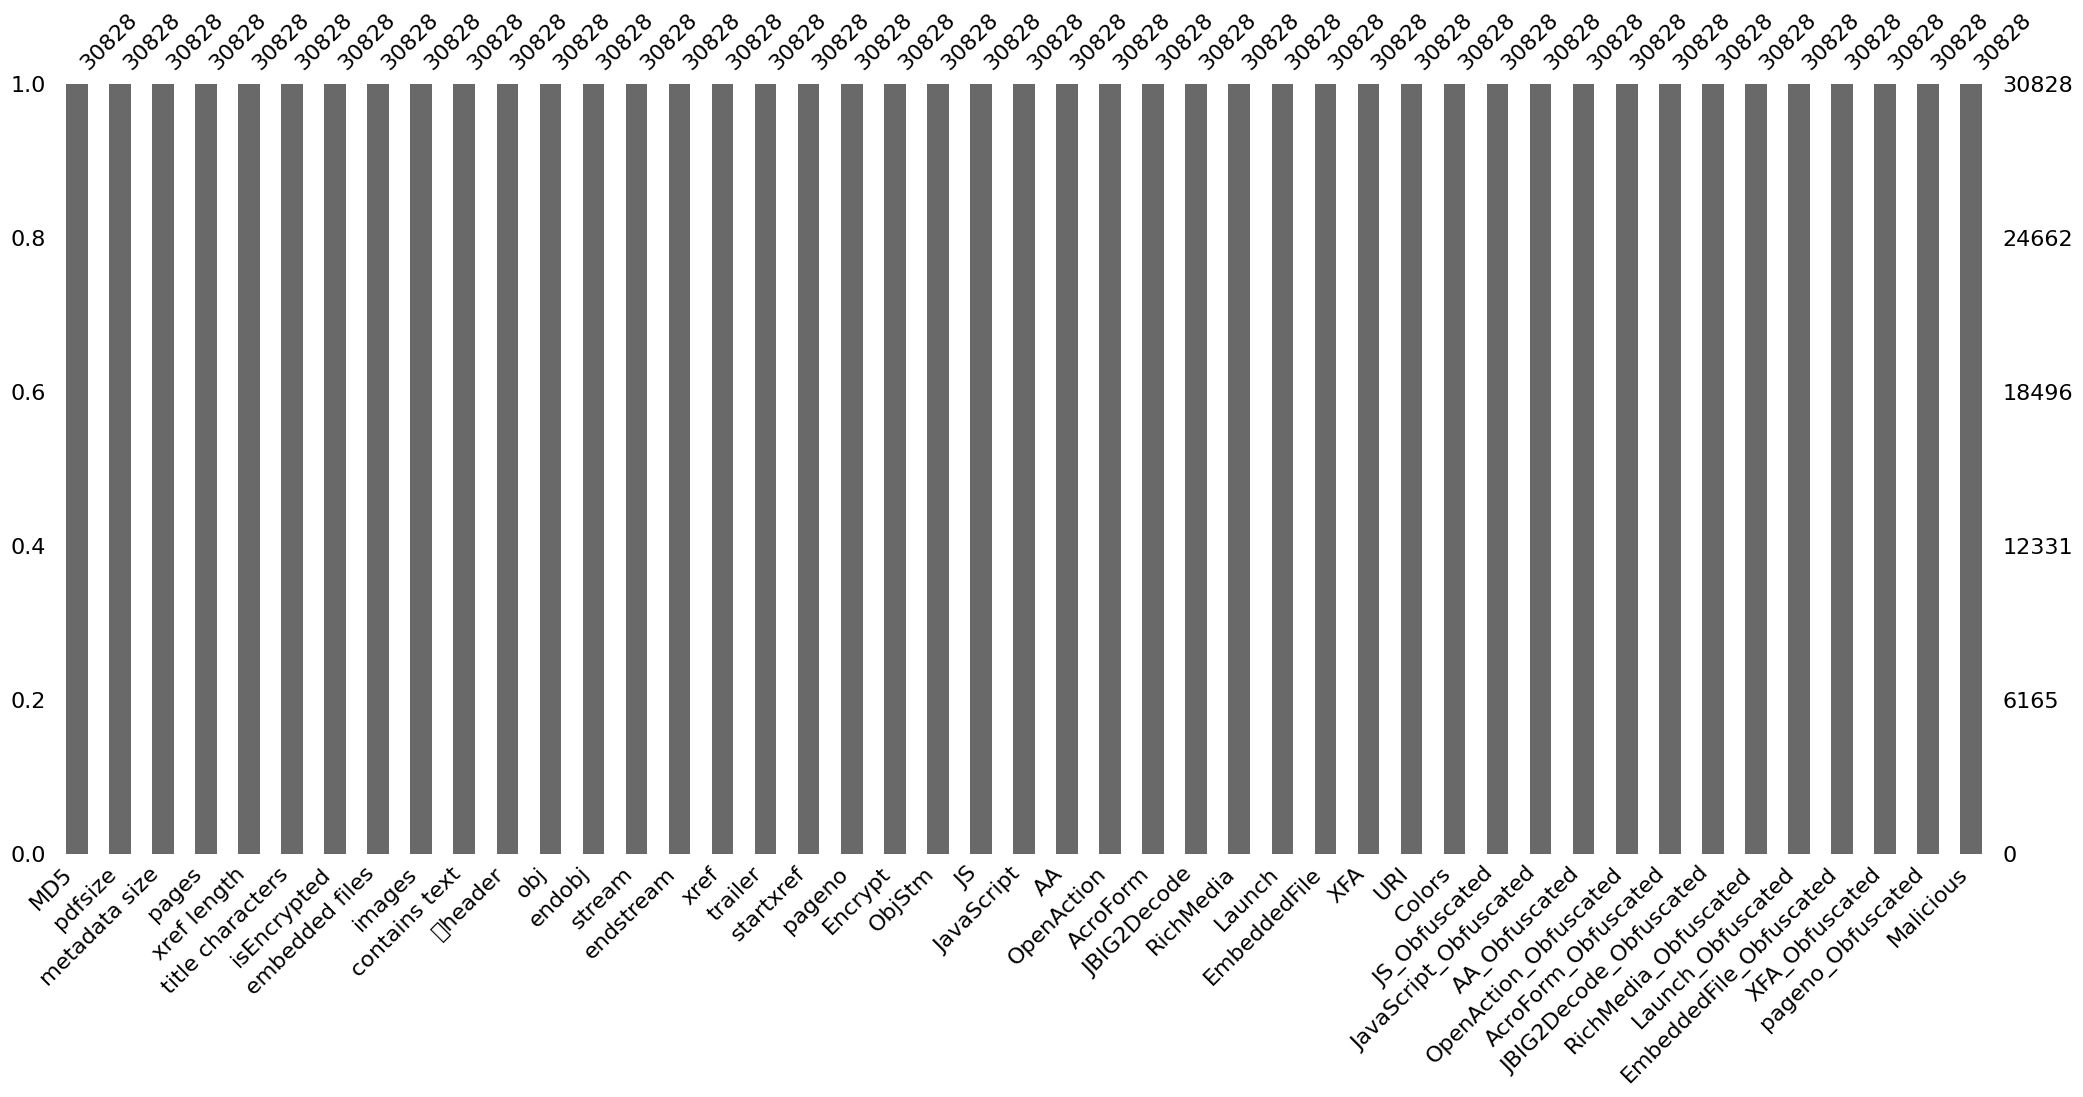

In [14]:
# Visualize Bar chart of missing values
msno.bar(df_pdf);

In [15]:
# store numerical columns to vaiable
numeric_columns = [x for x in df_pdf.columns if df_pdf[x].dtype != 'object'] # output 12 numerical variables

# identify Imputer
mice_imputer = IterativeImputer()

# Apply imputation 
df_pdf[numeric_columns] = mice_imputer.fit_transform(df_pdf[numeric_columns])

In [33]:
# Check missing after applied imputation 
df_pdf.isnull().sum()
df_pdf.MD5.unique()

array(['927eb9ebf03748be39637284224d811e',
       'fa52d2f82686287d972dc353b0fdbd15',
       '4eb5e4a52518f4c70d97f3a47526f558', ...,
       '69c1f7fbedf9387fc8bc58e540d5d232',
       'cf87094bbf42d9e47acd5ca11358fb09',
       'd401e0c5151a04aa0a5267d715aff1c2'], dtype=object)

In [34]:
sum(df_pdf.isnull().sum())

92484

In [35]:
# store categorical columns to independed vaiable
categorical_columns = [x for x in df_pdf.columns if df_pdf[x].dtype == 'object'] # output 20

# Check values of each categorical column that have missing value/s
for i in categorical_columns:
    print('Number of unique values for *{}*'.format(i), df_pdf[i].nunique())

Number of unique values for *MD5* 22038
Number of unique values for *contains text* 0
Number of unique values for *	header* 9
Number of unique values for *Malicious* 2


In [37]:
# # Impute categorical missing with most frequent of each column
# # Source: https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
# from sklearn.base import TransformerMixin

# class DataFrameImputer(TransformerMixin):

#     def __init__(self):
#         """Impute missing values.

#         Columns of dtype object are imputed with the most frequent value 
#         in column.
#         """
#     def fit(self, X, y=None):

#         self.fill = pd.Series([X[c].value_counts().index[0]
#             if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
#             index=X.columns)
#         print(self)
#         return self

#     def transform(self, X, y=None):
#         return X.fillna(self.fill)
    
#  # Apply miputation Function   
# df_pdf[categorical_columns] = DataFrameImputer().fit_transform(df_pdf[categorical_columns])

In [38]:
df_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30828 entries, 0 to 30827
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MD5                      30828 non-null  object 
 1   pdfsize                  30828 non-null  float64
 2   metadata size            30828 non-null  float64
 3   pages                    30828 non-null  float64
 4   xref length              30828 non-null  float64
 5   title characters         30828 non-null  float64
 6   isEncrypted              30828 non-null  float64
 7   embedded files           30828 non-null  float64
 8   images                   0 non-null      float64
 9   contains text            0 non-null      object 
 10  	header                  30828 non-null  object 
 11  obj                      30828 non-null  float64
 12  endobj                   30828 non-null  float64
 13  stream                   30828 non-null  float64
 14  endstream             

In [39]:
sum(df_pdf.isnull().sum())

92484

In [40]:
# Check duplicate points in our dataset
df_pdf=df_pdf.dropna()
df_pdf.duplicated().sum() # No duplicates

np.int64(0)

In [41]:
# Check number of samples for each class [Benign, Malicious]
# df_pdf.Class.value_counts()


AttributeError: 'DataFrame' object has no attribute 'Class'

In [25]:
df_pdf.head()


,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,AA_Obfuscated,OpenAction_Obfuscated,AcroForm_Obfuscated,JBIG2Decode_Obfuscated,RichMedia_Obfuscated,Launch_Obfuscated,EmbeddedFile_Obfuscated,XFA_Obfuscated,pageno_Obfuscated,Malicious
0,927eb9ebf03748be39637284224d811e,9.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes
1,fa52d2f82686287d972dc353b0fdbd15,12.0,180.0,1.0,9.0,0.0,0.0,0.0,0.0,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes
2,4eb5e4a52518f4c70d97f3a47526f558,15.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes
3,96e6e2dda69b2814152c5d400c61cafb,16.0,180.0,1.0,10.0,0.0,0.0,0.0,0.0,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes
4,294617661a240f71662ebe0e35aa7559,172.0,271.0,1.0,44.0,0.0,0.0,0.0,0.0,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No


In [42]:
data = df_pdf 
data.head()


,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,AA_Obfuscated,OpenAction_Obfuscated,AcroForm_Obfuscated,JBIG2Decode_Obfuscated,RichMedia_Obfuscated,Launch_Obfuscated,EmbeddedFile_Obfuscated,XFA_Obfuscated,pageno_Obfuscated,Malicious


In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

 # Assuming df_pdf is your DataFrame
data.iloc[:, 31] = data.iloc[:, 31].map({'Malicious': 1, 'Benign': 0})
data.iloc[:, 8] = data.iloc[:, 8].map({'Yes': 1, 'No': 0,'unclear':0,"-1":0,"0":0})
data.head()

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,AA_Obfuscated,OpenAction_Obfuscated,AcroForm_Obfuscated,JBIG2Decode_Obfuscated,RichMedia_Obfuscated,Launch_Obfuscated,EmbeddedFile_Obfuscated,XFA_Obfuscated,pageno_Obfuscated,Malicious


In [28]:
from sklearn.preprocessing import LabelEncoder

original_values = np.array(['\t%PDF-1.3', '\t%PDF-1.6', '\t%PDF-1.5', '\t%PDF-1.4',
                            '\t%PDF-\\x07.3', '\t%PDF-1.0', '\t%PDF-1.7', '\t%PDF-1.1',
                            '\t%PDF-1.6%â', '\t%PDF-1.', '\t%PDF-1.3%ï', '\t%PDF-1.2',
                            '\t%PDF-aaa', '\t%PDF-11311', '\t2]', '\ta', '\t%PDF-11113',
                            '\t%PDF-1.544', '\t%PDF-1.344', '\t%PDF-13131', '\t%PDF-\\x00.4',
                            '\t%PDF-0.9', '\t%PDF-2.4', '\t%PDF-1.8', '\t%PDF-1.6"',
                            '\t%PDF-\\\\\\\\x07', '\t%PDF-1.1"', '\t%PDF-1.3"', '\t%PDF-1.5"',
                            '\t%PDF-1.4"', '\toccured*', '\t%PDF-1.0"', '\t%PDF-1.7"',
                            '\t%PDF-1.4\\\\n', '\t%PDF-1.3\\\\n', '\t%PDF-2.4"', '\t%PDF-1."',
                            '\t%PDF-1.2"', '\t%PDF-1.0\\\\n', '\t%PDF-aaa"', '1', '0',
                            '\t/bin/sh: 1: _Cunningham_Studio.pdf: not found',
                            '\tError opening file /mnt/hgfs/kali_stuff/CLEAN_PDF_9000_files/Albert_Berger',
                            "\t[Errno 2] No such file or directory: '/mnt/hgfs/kali_stuff/CLEAN_PDF_9000_files/Albert_Berger",
                            '\t/bin/sh: 1: Syntax error: "(" unexpected',
                            '\t/bin/sh: 1: Syntax error: Unterminated quoted string', '\tyour',
                            '-1',
                            '\tError opening file /mnt/hgfs/kali_stuff/CLEAN_PDF_9000_files/Inheritances'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the original values
numeric_values = label_encoder.fit_transform(original_values)

# Create a mapping of original values to numeric values
value_mapping = {original: encoded for original, encoded in zip(original_values, numeric_values)}

# Convert the 10th column using the mapping
data.iloc[:,9] = df_pdf.iloc[:,9].map(value_mapping)
data.header.unique()

AttributeError: 'DataFrame' object has no attribute 'header'

In [25]:
data.iloc[:, 7] = data.iloc[:, 7].map({'0':0, '-1':0, '15':15, '1':1, '2':2, '4':4, '3':3, '6':6, '12':12, '7':7, '5':5, '14':14,
       '8':8, '11':11, '32':32, '30':30, '18':18, '9':9, '34':34, '19':19, '369':369, '21':21, '23':23,
       '81':81, '24':24, '898':898, '1(1)':0, '68':68, '41':41, '52':52, '54':54, '46':46, '207':207,
       '13':13, '28':28, '17':17, '10':10, '16':16, '20':20, '22':22, '27':27, '47':47, '26':26, '31':31,
       '25':25, '29':29, '37':37, '75':75, '39':39, '40':40, '45':45, '36':36, '42':42, '50':50, '111':111,
       '84':84, '38':38, '66':66, '71':71, '44':44, '172':172, '109':109, '57':57, '48':48, '62':62, '43':43,
       '35':35, '33':33, '76':76, '72':72, '83':83, '86':86, '60':60, '99':99, '95':95, '94':94, '92':92,
       '97':97, '88':88, '89':89, '90':90, '78':78, '79':79, '56':56, '58':58, '592':592, '61':61, '107':107,
       '126':126})

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   isEncrypted       10026 non-null  float64
 6   embedded files    10026 non-null  float64
 7   images            10026 non-null  object 
 8   text              10026 non-null  object 
 9   header            10004 non-null  object 
 10  obj               10026 non-null  object 
 11  endobj            10026 non-null  object 
 12  stream            10026 non-null  float64
 13  endstream         10026 non-null  object 
 14  xref              10026 non-null  object 
 15  trailer           10026 non-null  float64
 16  startxref         10026 non-null  object

In [27]:

# Assuming 'data' is your DataFrame
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting non-convertible values to NaN
data.fillna(0, inplace=True)  #


data.head() # Ensure data is loaded correctly




,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,0,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,0,21.0,...,0.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,0.0,1
2,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,1,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,0,10.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,1,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [28]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   isEncrypted       10026 non-null  float64
 6   embedded files    10026 non-null  float64
 7   images            10026 non-null  int64  
 8   text              10026 non-null  int64  
 9   header            10026 non-null  float64
 10  obj               10026 non-null  float64
 11  endobj            10026 non-null  float64
 12  stream            10026 non-null  float64
 13  endstream         10026 non-null  float64
 14  xref              10026 non-null  float64
 15  trailer           10026 non-null  float64
 16  startxref         10026 non-null  float6

In [29]:
# Dropping column 1 (index 0), column 5 (index 4), and keeping necessary columns
X = data.drop(columns=[ data.columns[31]])  # Adjusted indices
y = data.iloc[:, 31]
X.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   isEncrypted       10026 non-null  float64
 6   embedded files    10026 non-null  float64
 7   images            10026 non-null  int64  
 8   text              10026 non-null  int64  
 9   header            10026 non-null  float64
 10  obj               10026 non-null  float64
 11  endobj            10026 non-null  float64
 12  stream            10026 non-null  float64
 13  endstream         10026 non-null  float64
 14  xref              10026 non-null  float64
 15  trailer           10026 non-null  float64
 16  startxref         10026 non-null  float6

In [30]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10026 entries, 0 to 10025
Series name: Class
Non-Null Count  Dtype
--------------  -----
10026 non-null  int64
dtypes: int64(1)
memory usage: 78.5 KB


In [31]:
# Ensure y is aligned with X
y = y.iloc[:X.shape[0]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



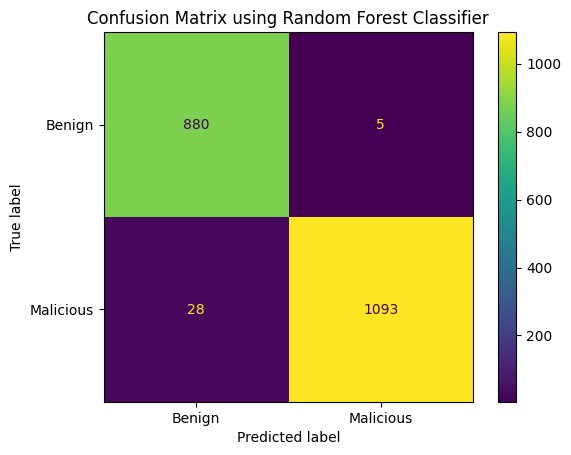

False Positive Rate: 0.005649717514124294
True Positive Rate: 0.9750223015165032
Accuracy Score: 0.9835493519441675


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=2, max_depth=500, random_state=42, max_features='log2')

# Train the model
rf.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf)}')

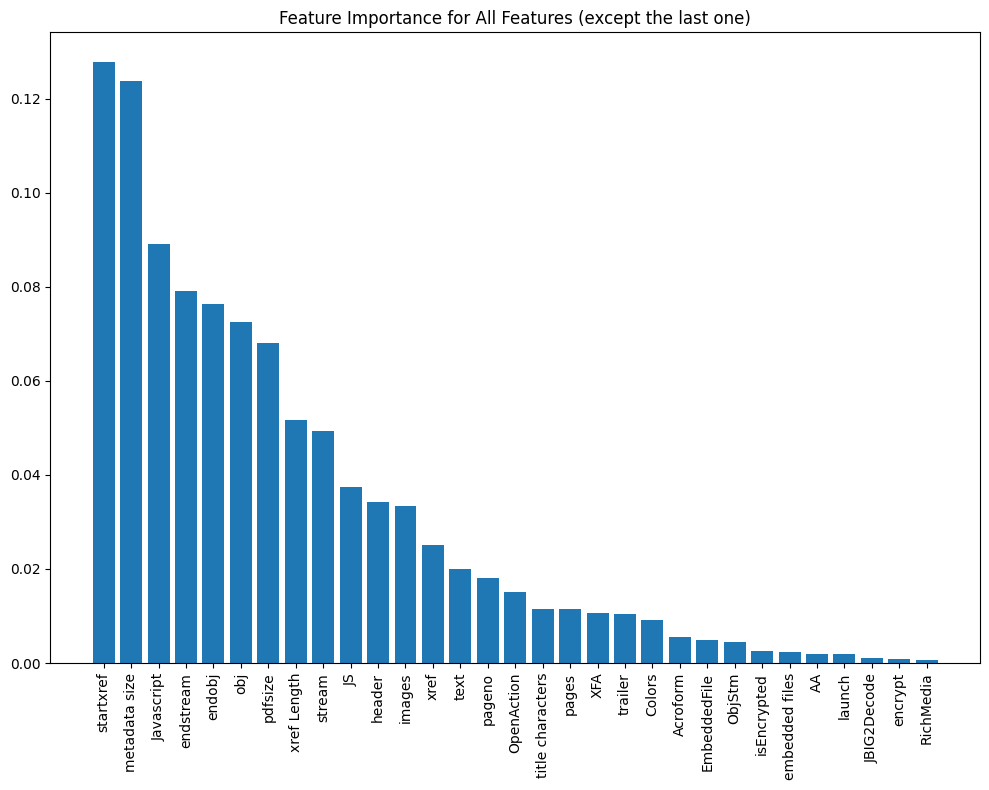

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming your dataset is in 'df'

# Separate features (all columns except the last one) and target (the last column)
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # The last column as the target

# If your dataframe is a pandas DataFrame, get feature names (column names except the last one)
feature_names = data.columns[:-1]

# Train the Random Forest model using all features
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

# Extract feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance graph
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for All Features (except the last one)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()



In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   isEncrypted       10026 non-null  float64
 6   embedded files    10026 non-null  float64
 7   images            10026 non-null  int64  
 8   text              10026 non-null  int64  
 9   header            10026 non-null  float64
 10  obj               10026 non-null  float64
 11  endobj            10026 non-null  float64
 12  stream            10026 non-null  float64
 13  endstream         10026 non-null  float64
 14  xref              10026 non-null  float64
 15  trailer           10026 non-null  float64
 16  startxref         10026 non-null  float6

In [35]:
X1 = data.drop(columns=[data.columns[6],data.columns[5],data.columns[22],data.columns[27],data.columns[25],data.columns[18],data.columns[26], data.columns[31]])  # Adjusted indices
y1 = data.iloc[:, 31]
X1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   images            10026 non-null  int64  
 6   text              10026 non-null  int64  
 7   header            10026 non-null  float64
 8   obj               10026 non-null  float64
 9   endobj            10026 non-null  float64
 10  stream            10026 non-null  float64
 11  endstream         10026 non-null  float64
 12  xref              10026 non-null  float64
 13  trailer           10026 non-null  float64
 14  startxref         10026 non-null  float64
 15  pageno            10026 non-null  float64
 16  ObjStm            10026 non-null  float6

In [36]:
# Ensure y is aligned with X
y1 = y1.iloc[:X1.shape[0]]

# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)



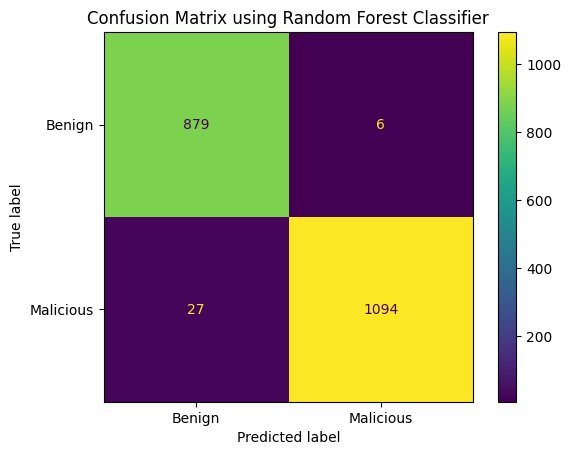

False Positive Rate: 0.006779661016949152
True Positive Rate: 0.975914362176628
Accuracy Score: 0.9835493519441675


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Initialize Random Forest Classifier
rf1 = RandomForestClassifier(n_estimators=2, max_depth=500, random_state=42, max_features='log2')

# Train the model
rf1.fit(X_train1, y_train1)

# Make Predictions
y_pred_rf1 = rf1.predict(X_test1)

# Confusion Matrix
tn1, fp1, fn1, tp1 = confusion_matrix(y_test1, y_pred_rf1).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test1, y_pred_rf1), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp1 / (fp1 + tn1)}')
print(f'True Positive Rate: {tp1 / (tp1 + fn1)}')
print(f'Accuracy Score: {accuracy_score(y_test1, y_pred_rf1)}')

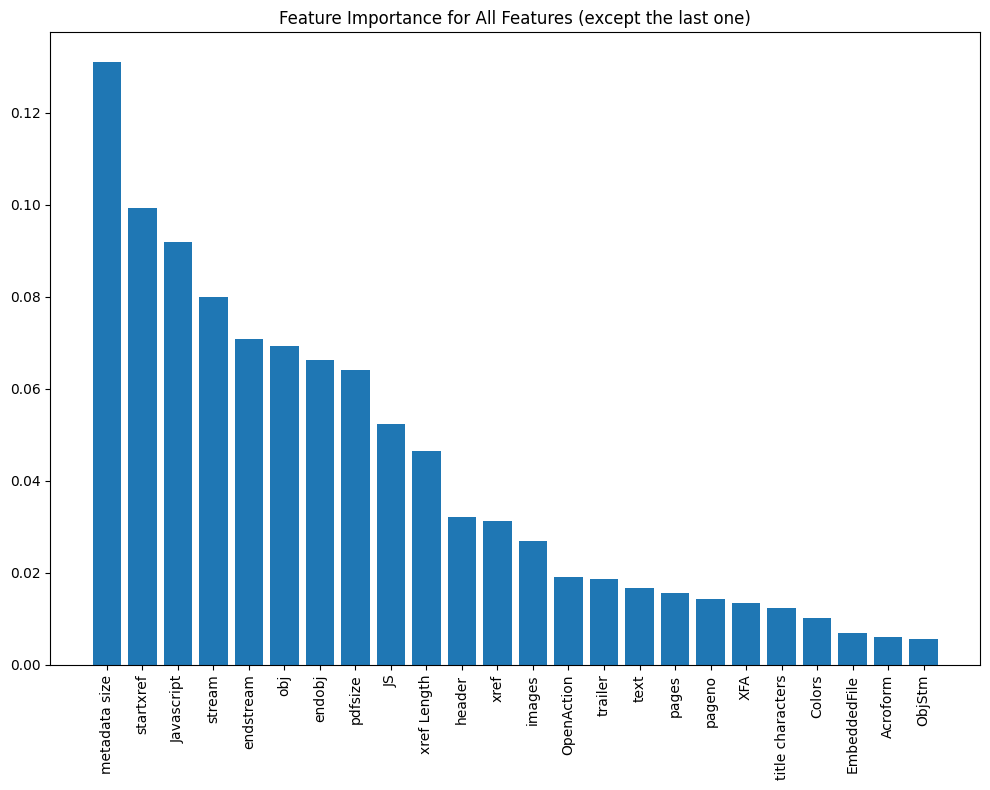

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


# If your dataframe is a pandas DataFrame, get feature names (column names except the last one)
feature_names = X1.columns[:]

# Train the Random Forest model using all features
rf1 = RandomForestClassifier(n_estimators=200, random_state=42)
rf1.fit(X1, y1)

# Extract feature importances
importances = rf1.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance graph
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for All Features (except the last one)")
plt.bar(range(X1.shape[1]), importances[indices], align="center")
plt.xticks(range(X1.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

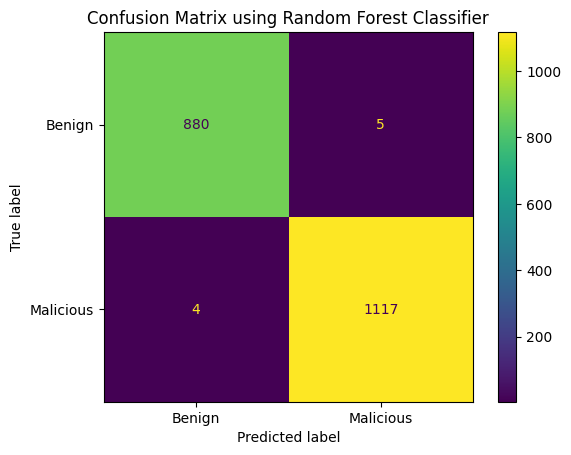

False Positive Rate: 0.005649717514124294
True Positive Rate: 0.9964317573595004
Accuracy Score: 0.9955134596211366


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Initialize Random Forest Classifier

rf4 = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200)

# Train the model
rf4.fit(X_train, y_train)

# Make Predictions
y_pred_rf4 = rf4.predict(X_test)

# Confusion Matrix
tn4, fp4, fn4, tp4 = confusion_matrix(y_test, y_pred_rf4).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf4), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp4 / (fp4 + tn4)}')
print(f'True Positive Rate: {tp4 / (tp4 + fn4)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf4)}')